# Genetic Algorithms (first trial)

### Plan

- Make some workers
- Set a population size 
- make them randomly go through the routes 
- Create location instances 

** ALSO, routes must include origin**


Functions:
- A function that calculates distance between two points


In [2]:
from typing import List
from random import sample

class Location:
    def __init__(self, location_name, x, y):
        self.location_name = location_name
        self.x = x 
        self.y = y
    
    def __str__(self):
         return self.location_name
    
    def __repr__(self):
        return self.location_name

class Traveller:
    def __init__(self, name, parent=None):
        self.route = None
        self.name = f"TR({name})"
        self.parent = parent
    
    def __str__(self):
         return f"Traveller({self.name})"
    
    def __repr__(self):
        return f"Traveller({self.name})"
    
    def set_random_route(self, locs: List[Location]) -> None:
        """
        Creates a randomised route that takes a traveller from home and back again. 
        
        For now, we always start at holborn
        
        """
        starting_point = locs[:1]
        self.route = starting_point + sample(locations[1:], len(locations[1:]))
    
    def route_total(self) -> float:
        if self.route == None or len(self.route) < 2: 
            return 0

        total_distance = 0
        for i in range(0, len(self.route)-1):
            total_distance += calculate_distance(self.route[i], self.route[i+1])
        return total_distance

In [3]:
'''
List of locations
'''

locations = [
    Location('1. holborn', 8, 4),
    Location('2. chinatown', 4, 4),
    Location('3. piccadilly circus', 2, 2),
    Location('4. oxford circus', 3, 6),
    Location('5. covent garden', 6, 2),
    Location('6. tottenham court road', 6, 6),
    Location('7. charing cross', 4, 1)
]

In [4]:
'''
Some utilities
'''
import math

def calculate_distance(loc_1, loc_2: Location) -> float:
    """
    calculates the distance between two points and returns a float
    """
    x_diff = abs(loc_1.x - loc_2.x)
    y_diff = abs(loc_1.y - loc_2.y)
    
    return math.sqrt(x_diff**2 + y_diff**2)

some_route = [
    Location("somewhere",3,4),
    Location("here",2,2),
]

def calc_route_total_distance(route: List[Location]) -> float:
    if len(route) < 2:
        raise Exception("route is too short")
    
    total_distance = 0
    for i in range(0, len(route)-1):
        total_distance += calculate_distance(route[i], route[i+1])
    return total_distance

calc_route_total_distance(some_route)

2.23606797749979

# Initial population

In [5]:
"""
Set a population size and generate some routes for them
"""
from typing import List

GENERATION = 1

population_size = 5
travellers = []

for i in range(0,population_size):
    tr = Traveller(f"gen_{GENERATION}:{i}", None)
    tr.set_random_route(locations)
    travellers.append(tr)
#     print(f"\nTraveller {i}:")
#     list(map(lambda l: print(l.location_name), tr.route))

# Fitness

In [6]:
"""
Calculate the fitness score of each traveller's route. Essentially the efficiency by distance.

Calculate the distance from 1st location to 2nd, then 2nd to 3rd and so on, until n-1 the last location.
"""


"""
Fitness scores for all traveller routes

Let's use a softmax to give it relative weighting for selection
"""

from typing import Dict
import math
from pprint import pprint

traveller_to_distance = {}
RELEVANCY_POW = 4

# Get a mapping between the traveller and total distance to travel
for t in travellers:
    traveller_to_distance[t] = round(t.route_total(), 2)

# pprint(traveller_to_distance)

"""
Get shortest relative distances from the maximum
"""
def weight_routes(traveller_to_distance: Dict[Traveller, float]) -> Dict[Traveller, float] :
    '''
    Returns a dict with travel to fitness score, demonstrating the effectiveness of each routes
    '''
    max_distance = max(list(traveller_to_distance.values()))
    min_distance = min(list(traveller_to_distance.values()))
#     print("Max distance: ", max_distance)
#     print("Min distance: ", min_distance)
       
    return {k: pow(max_distance/traveller_to_distance[k],RELEVANCY_POW) for k,v in traveller_to_distance.items()}

weighted_routes_mapping = weight_routes(traveller_to_distance)

# pprint(weighted_routes_mapping)

"""
Transform the scores to get probabilities for selection using softmax function
"""

def convert_to_softmax_value(loc_to_score: Dict[Location, float]):
    expo_sum_for_all = sum(list(map(lambda x: math.exp(x), list(loc_to_score.values()))))
    new_dict = {k: int(round((math.exp(v)/expo_sum_for_all)*100,0)) for k, v in loc_to_score.items()}
    return new_dict


fitness_scores = convert_to_softmax_value(weighted_routes_mapping)
# print("\nFitness scores: ")
pprint(fitness_scores)

{Traveller(TR(gen_1:1)): 7,
 Traveller(TR(gen_1:0)): 25,
 Traveller(TR(gen_1:2)): 46,
 Traveller(TR(gen_1:3)): 15,
 Traveller(TR(gen_1:4)): 7}


In [7]:
from typing import Tuple 

def get_ranked_fitness(fs: Dict[Traveller, float]) -> Tuple[Traveller, float]: 
    '''
    Returns top result
    '''
    return sorted(fitness_scores.items(), key=lambda x: x[1], reverse=True)

get_ranked_fitness(fitness_scores)[0]

(Traveller(TR(gen_1:2)), 46)

In [8]:
'''
Plot best route
'''
%matplotlib inline 

import matplotlib.pyplot as plt
from random import randint
import itertools

def plot_graph_of_traveller_route(fig, ax, locs: List[Location]): 

    colors = [
            "red",
            "limegreen",
            "gold",
            "tomato",
            "black",
            "orange",
            "skyblue",
            "darkviolet"
        ]

    iterator = itertools.cycle(colors)

    x = list(map(lambda l: l.x, locs))
    y = list(map(lambda l: l.y, locs))

    ax.scatter(x,y)
    ax.grid()

    # Annotate
    for i in range(0, len(locations)):
        location = locations[i]
        ax.annotate(location.location_name, (location.x, location.y)) 


    for i in range(0, len(x)-1):
        rc = iterator.__next__()
        x_diff_half, y_diff_half = (x[i+1] - x[i])/2, (y[i+1] - y[i])/2
        ax.arrow(x[i], y[i], x_diff_half, y_diff_half,
                  length_includes_head=True,
                  width=0.02, color=rc,
                  linestyle="dashed",
                  head_width=0.1,
                 )
        ax.arrow(x[i] + x_diff_half, y[i] + y_diff_half, x_diff_half, y_diff_half,
                  length_includes_head=True,
                  width=0.02, color=rc,
                  linestyle="dashed",
                  head_width=0.0,
                 )

Best route from Traveller(TR(gen_1:2)) of distance 18.42366870536343
Second best route from Traveller(TR(gen_1:0)) of distance 23.092571320583524

Displaying root below: 
1. holborn
2. chinatown
5. covent garden
7. charing cross
3. piccadilly circus
4. oxford circus
6. tottenham court road

1. holborn
5. covent garden
2. chinatown
6. tottenham court road
7. charing cross
4. oxford circus
3. piccadilly circus


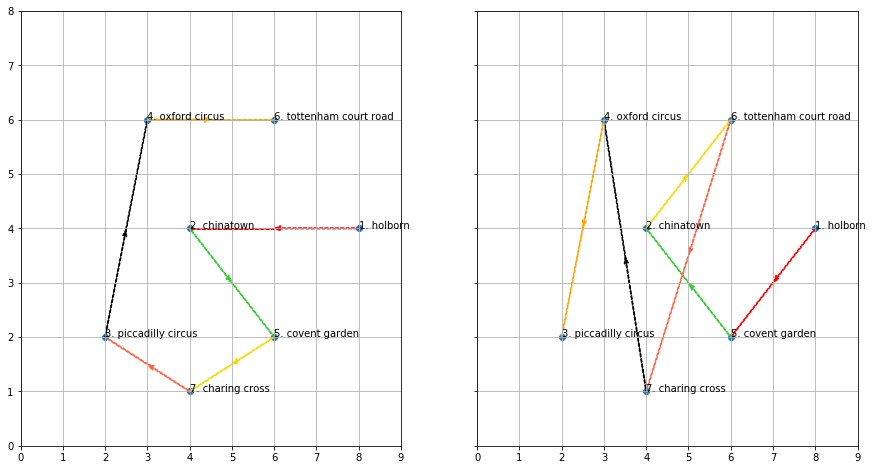

In [8]:
'''
Take a look at the best route
'''

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,8), sharex=True , sharey=True)

rf = get_ranked_fitness(fitness_scores)

best_traveller = rf[0][0]
second_best = rf[1][0]

print(f"Best route from {best_traveller} of distance {best_traveller.route_total()}")
print(f"Second best route from {second_best} of distance {second_best.route_total()}")

print("\nDisplaying root below: ")
for l in best_traveller.route:
    print(l)

print("")
for l in second_best.route:
    print(l)
    
plot_graph_of_traveller_route(fig, ax1, best_traveller.route)
plot_graph_of_traveller_route(fig, ax2, second_best.route)

plt.xlim(0, 9)
plt.ylim(0, 8)
plt.show()

# Selection, Crossover, Mutation

In [91]:
'''
UTILITIES!
'''

def draw_traveller_at_random(tickets: List[int]) -> Traveller:
    return tickets[randint(0,len(tickets)-1)]

def create_raffle_tickets(fitness_scores: Dict[Traveller, float], population_size: int) -> List[Traveller]:
    multiplier = 100 / population_size if population_size > 0 else 0
#     print("Multiplier: ", multiplier)

    tickets = []

    for t, s in fitness_scores.items():
        for i in range(0,s):
            tickets.append(t)
    return tickets

def shuffle_locations(locs: List[Location]) -> List[Location]: 
    '''
    Cannot shuffle location if the beginning or the end 
    
    WRITE TESTS FOR THIS! EASY TO DEBUG
    '''    
    origin = Location("home", 0, 0)
#     print("Shuffling: ", locs)
#     print("first loc: ", locs[0])    
#     print("does it match: ", "home" == locs[0].location_name)
    
    if locs[0].location_name == origin.location_name:
        shuffled_locs = [origin] + sample(locs[1:], len(locs[1:]))
    elif locs[-1].location_name == origin.location_name:
        shuffled_locs = sample(locs[:-1], len(locs[:-1])) + [origin]
    else:
        shuffled_locs = sample(locs, len(locs))

    return shuffled_locs

def calc_superiority_percentage(tr: List[Traveller]) -> float:
    
    '''
    Compares the current generation to the last
    '''
    
    print("new offspring:")
    print("HOW MANY ARE BETTER THAN PARENT?:")

    superior_children = []

    for o in offspring: 
    #     print(f"\noffspring name: {o.name}")
    #     print(f"TOTAL DISTANCE: {calc_route_total_distance(o.route)}")
    #     print(f"parent distance: {calc_route_total_distance(o.parent.route)}")
    #     pprint(o.route)
        if calc_route_total_distance(o.route) < calc_route_total_distance(o.parent.route):
            superior_children.append(o)

    pprint(superior_children)
    (len(superior_children)/population_size) * 100
    return (len(superior_children)/population_size) * 100

In [83]:
'''
Perform selective crossover

BEST ONE YET
'''

from pprint import pprint

tickets = create_raffle_tickets(fitness_scores, population_size)

def find_best_slice_index(genes: List[Location], slice_size:int):
    
    if slice_size > len(genes) - 1:
        raise Exception("Slice size exceeds genes length")
    
    first_slice = genes[0:slice_size]
    best_slice = [0, calc_route_total_distance(first_slice)] # index, total_distance of best slice
#     print("First worst slice: ", first_slice, "with distance: ", calc_route_total_distance(first_slice))

    for i in range(1, len(genes)+1-slice_size):
        route_slice = genes[i:i+slice_size]
        route_slice_distance = calc_route_total_distance(route_slice)
#         print(f"Total Distance from index {i}: {route_slice_distance}")
        if route_slice_distance < best_slice[1]:
            best_slice = (i, round(route_slice_distance,1))
#     print("Best slice: ", best_slice)
    best_slice_index = best_slice[0]
    return best_slice[0], genes[best_slice_index:best_slice_index+slice_size]

def crossover_parents(tr1: Traveller, tr2: Traveller) -> List[Traveller]:
    '''
    Takes two parents, performs crossover and produces X offspring
    '''
    
    tr1_best_slice_index, tr1_best_slice = find_best_slice_index(tr1.route,3)
    
    child_1 = list()
    is_added = False

    for i in range(0, len(tr2.route)):
        tr1_loc_names = list(map(lambda l: l.location_name, tr1_best_slice))
#         print("printing names: ", tr1_loc_names)
        if tr2.route[i].location_name not in tr1_loc_names:
            child_1.append(tr2.route[i])
        else:
            if is_added == False:
                child_1 += tr1_best_slice
                is_added = True 
    is_added = False 
    return child_1
    

def generate_offspring_using_crossover(fitness_scores, co_probability=0.7):
    offspring = list()

    random_slice_size = 3
    
    tickets = create_raffle_tickets(fitness_scores, population_size)

    for i in range(0, int(population_size)+1,2):
            
        pick_1 = draw_traveller_at_random(tickets)
        pick_2 = draw_traveller_at_random(tickets)

        if randint(0,99) > co_probability * 100: 
            offspring.append(pick_1)
            offspring.append(pick_2)
            continue
            
        child_1_route = crossover_parents(pick_1, pick_2)
        child_2_route = crossover_parents(pick_2, pick_1)

        # ADD OFFSPRING to LIST
        GENERATION = 2
        new_child_1 = Traveller(f"gen:{GENERATION}:{i+1}", pick_1)
        new_child_2 = Traveller(f"gen:{GENERATION}:{i+2}", pick_2)
        new_child_1.route = child_1_route
        new_child_2.route = child_2_route

        offspring.append(new_child_1)
        offspring.append(new_child_2)
    return offspring


#1. Crossover 
offspring = generate_offspring_using_crossover(fitness_scores)

# CHECK PARENTS
# for o in offspring:
#     print("PARENT OF O: ", o.parent)
    
# HOW MANY ARE BETTER THAN GENERATION 1 

print(offspring)

winning_children = 0
for i in range(0, population_size):
    gen_1_travel = calc_route_total_distance(travellers[i].route)
    gen_2_travel = calc_route_total_distance(offspring[i].route)

    if gen_1_travel < gen_2_travel:
        winning_children += 1
    
print("Winning children total", winning_children, "out of ", population_size)

Multiplier:  20.0
Multiplier:  20.0
[Traveller(TR(gen:2:1)), Traveller(TR(gen:2:2)), Traveller(TR(gen:1:4)), Traveller(TR(gen:1:3)), Traveller(TR(gen:2:5)), Traveller(TR(gen:2:6))]
Winning children total 1 out of  5


# Mutation

In [121]:
from random import randint

def mutate_single_offspring(tr: Traveller) -> Traveller: 
    
    random_index_1,random_index_2 = randint(1, len(tr.route)-1), randint(1, len(tr.route)-1)
        
    while random_index_2 == random_index_1:
        random_index_2 = randint(1, len(tr.route)-1)
    
    tr.route[random_index_1], tr.route[random_index_2] = tr.route[random_index_2], tr.route[random_index_1]
    return tr
    
def mutate_offspring(trs: List[Traveller], probability=0.05):
    
    mutants_and_non_mutants = []
    for tr in trs:
        to_add = tr
        random_int = randint(0,99)
#         print("RANDOM_INT: ", random_int)
        if random_int < (probability * 100):
#             print("mutating...", probability * 100)
            to_add = mutate_single_offspring(tr)
        mutants_and_non_mutants.append(to_add)
    return mutants_and_non_mutants

print(len(offspring))
mutate_offspring(offspring)

# HOW MANY ARE BETTER THAN GENERATION 1 

winning_children = 0
for i in range(0, population_size):
    gen_1_travel = calc_route_total_distance(travellers[i].route)
    gen_2_travel = calc_route_total_distance(offspring[i].route)

    if gen_1_travel < gen_2_travel:
        winning_children += 1
    
print("Winning children total", winning_children, "out of ", population_size)

22
Winning children total 8 out of  20


In [89]:
'''
BEST SLICES FROM TWO PARENTS, shuffle the surrounding

'''

from random import randint, sample
from typing import List

tickets = create_raffle_tickets(fitness_scores, population_size)
offspring = []

# for i in range(0, population_size):
population_size = 20 # REMOVE LATER

def find_worst_slice_index(genes: List[Location], slice_size:int):
    
    if slice_size > len(genes) - 1:
        raise Exception("Slice size exceeds genes length")
    
    first_slice = genes[0:slice_size]
    worst_slice = [0, calc_route_total_distance(first_slice)] # index, total_distance of worst slice
#     print("First worst slice: ", first_slice, "with distance: ", calc_route_total_distance(first_slice))

    for i in range(1, len(genes)-slice_size):
        route_slice = genes[i:i+slice_size]
        route_slice_distance = calc_route_total_distance(route_slice)
#         print(f"Distance from {i}: {route_slice_distance}")
        if route_slice_distance > worst_slice[1]:
            worst_slice = (i, round(route_slice_distance,1))
#     print("Worse slice: ", worst_slice)
    worst_slice_index = worst_slice[0]
    return worst_slice[0], genes[worst_slice_index:worst_slice_index+slice_size]
        
for i in range(0, population_size):
    pick = draw_traveller_at_random(tickets)
    
    random_slice_size = 3

    #Find worst slice index
    ws_index_1, worst_slice = find_worst_slice_index(pick.route, random_slice_size)
    shuffled_ws = shuffle_locations(worst_slice)
#     print(ws_index_1)
#     print(worst_slice)
  
    mutation = pick.route[:ws_index_1] + shuffled_ws + pick.route[ws_index_1+random_slice_size:] 
#     print("Parent route:")
#     pprint(pick.route)
#     print("child route:")
#     pprint(mutation)



    # ADD OFFSPRING to LIST
    GENERATION = 2
    new_child = Traveller(f"gen:{GENERATION}:{i+1}", pick)
    new_child.route = mutation
    offspring.append(new_child)

print(f"Percentage of superior: {calc_superioty_percentage(offspring)}%")

Multiplier:  20.0


NameError: name 'calc_superioty_percentage' is not defined

# Putting it all together


In [1]:
num_of_gens = 50 
current_gen = 1
population_size = 20

traveller_to_distance = {}
RELEVANCY_POW = 3

def spawn_travellers(current_gen: int, pop_size: int):
    travellers = []
    for i in range(0,population_size):
        tr = Traveller(f"gen:{GENERATION}:{i}", None)
        tr.set_random_route(locations)
        travellers.append(tr)
    
    return travellers

locations = [
    Location('1. holborn', 8, 4),
    Location('2. chinatown', 4, 4),
    Location('3. piccadilly circus', 2, 2),
    Location('4. oxford circus', 3, 6),
    Location('5. covent garden', 6, 2),
    Location('6. tottenham court road', 6, 6),
    Location('7. charing cross', 4, 1)
]

travellers = spawn_travellers(current_gen, population_size)

# RUN FOR X generations
for i in range(1, 30):
    
    # Get a mapping between the traveller and total distance to travel
    for t in travellers:
        traveller_to_distance[t] = round(t.route_total(), 2)
    
    weighted_routes_mapping = weight_routes(traveller_to_distance)
    fitness_scores = convert_to_softmax_value(weighted_routes_mapping)
    
    offspring = generate_offspring_using_crossover(fitness_scores)
    offspring_with_mutations = mutate_offspring(offspring)
    
    # THE BEST OF EACH GENERATION
    
    pprint(min(list(map(lambda x: traveller_to_distance[x], traveller_to_distance))))

    current_gen += 1

NameError: name 'Location' is not defined

In [ ]:
"""
EMPTY SPACE





























"""